In [1]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import umap
import phenograph

sys.path.append('..')
import catrace
import catrace.scale as catscale
import catrace.process_time_trace as ptt
import catrace.exp_collection as ecl
import catrace.cluster as caclust
import dataset_param as dtpar

In [3]:
region = 'Dp'
separate_region = False
if separate_region:
    all_dfovf_select = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_dfovf_select.pkl'))
    all_dfovf_select_rg = all_dfovf_select.xs(region, level='region', axis=1)
    all_dfovf_select_rg.to_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))

In [4]:
compute_response = False
if compute_response:
    all_dfovf_select_rg = pd.read_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))
    if region =='OB':
        time_window = [5.5,11]
    else:
        time_window = [5,7]   
    frame_rate = 30/4
    all_response = ptt.mean_pattern_in_time_window(all_dfovf_select_rg, time_window, frame_rate)
    all_response.to_pickle(os.path.join(dtpar.db_dir, f'all_response_select_{region}.pkl'))
    all_response

In [5]:
all_response = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_response_select_{}.pkl'.format(region)))


H = catscale.standard_scale(all_response)
data = H.transpose()
fish_id = data.index.get_level_values('fish_id')
training_dict = dict(dtpar.exp_list)
train_cond= fish_id.map(training_dict)
cond_list = dtpar.cond_list
cond_order = {k: v for v, k in enumerate(cond_list)}
cond_idx = train_cond.map(cond_order)

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [7]:
data

odor                                             phe                      \
trial                                              0         1         2   
fish_id               cond    plane neuron                                 
2021-02-05-DpOBEM-JH9 phe-arg 0     1      -0.398815  2.055415 -0.037170   
                                    2       0.869787 -1.159753 -0.536624   
                                    3       2.614093  3.032630  0.460582   
                                    4       2.084132  1.661676 -0.884100   
                                    6      -0.529511 -0.293125 -1.064649   
...                                              ...       ...       ...   
2022-02-20-DpOBEM-N11 naive   3     435    -0.168528 -1.555830 -1.048084   
                                    439     0.071302  0.499111  0.222379   
                                    448     1.627910 -0.819050  0.908995   
                                    450    -0.055842 -0.238805  0.724721   
                                    471    -0.531837  0.188022  0.265116   

odor                                             trp                      \
trial                                              0         1         2   
fish_id               cond    plane neuron                                 
2021-02-05-DpOBEM-JH9 phe-arg 0     1      -0.603946  0.596759  0.800952   
                                    2       2.623124  1.567418  1.935785   
                                    3      -0.677807 -0.160650 -0.678060   
                                    4       0.432537  0.200028 -0.871551   
                                    6       1.655945  1.051865  0.192815   
...                                              ...       ...       ...   
2022-02-20-DpOBEM-N11 naive   3     435     0.503664 -1.121163  0.410949   
                                    439    -0.304064 -1.404796 -0.321117   
                                    448    -0.368256  0.322811 -0.579573   
                                    450     0.598033 -1.061759 -0.332677   
                                    471     1.778515  1.364788 -1.238894   

odor                                             arg                      \
trial                                              0         1         2   
fish_id               cond    plane neuron                                 
2021-02-05-DpOBEM-JH9 phe-arg 0     1       0.040956  0.297422 -0.219310   
                                    2       0.275287  0.071348  0.611662   
                                    3      -0.652233  1.028874  0.720293   
                                    4      -0.148749  1.780663  1.532981   
                                    6       3.371722  0.629866 -1.107670   
...                                              ...       ...       ...   
2022-02-20-DpOBEM-N11 naive   3     435     0.858473 -0.578258 -0.300633   
                                    439     1.957970  1.004372  1.669669   
                                    448     1.220476 -1.550744 -1.306041   
                                    450    -1.001976 -0.654945 -1.174051   
                                    471    -0.827885  0.746537 -0.384777   

odor                                            tdca  ...       tca       gca  \
trial                                              0  ...         2         0   
fish_id               cond    plane neuron            ...                       
2021-02-05-DpOBEM-JH9 phe-arg 0     1       0.159409  ...  0.552657 -1.028570   
                                    2       0.070137  ... -0.823204 -1.596167   
                                    3      -0.016520  ... -0.472705 -0.815928   
                                    4      -0.823443  ... -0.765663 -0.155534   
                                    6       0.633460  ... -0.172273  0.049975   
...                                              ...  ...       ...       ...   
2022-02-20-DpOBEM-N11 naive   3     435     0.215996  ... -1.551773  1.87404

In [15]:
# Remvome first trial
data.drop([0], inplace=True, axis=1, level=1)
data.columns.remove_unused_levels().levels[0]

Index(['phe', 'trp', 'arg', 'tdca', 'tca', 'gca', 'acsf', 'spont'], dtype='object', name='odor')

In [16]:
data

odor                                             phe                 trp  \
trial                                              1         2         1   
fish_id               cond    plane neuron                                 
2021-02-05-DpOBEM-JH9 phe-arg 0     1       2.055415 -0.037170  0.596759   
                                    2      -1.159753 -0.536624  1.567418   
                                    3       3.032630  0.460582 -0.160650   
                                    4       1.661676 -0.884100  0.200028   
                                    6      -0.293125 -1.064649  1.051865   
...                                              ...       ...       ...   
2022-02-20-DpOBEM-N11 naive   3     435    -1.555830 -1.048084 -1.121163   
                                    439     0.499111  0.222379 -1.404796   
                                    448    -0.819050  0.908995  0.322811   
                                    450    -0.238805  0.724721 -1.061759   
                                    471     0.188022  0.265116  1.364788   

odor                                                       arg            \
trial                                              2         1         2   
fish_id               cond    plane neuron                                 
2021-02-05-DpOBEM-JH9 phe-arg 0     1       0.800952  0.297422 -0.219310   
                                    2       1.935785  0.071348  0.611662   
                                    3      -0.678060  1.028874  0.720293   
                                    4      -0.871551  1.780663  1.532981   
                                    6       0.192815  0.629866 -1.107670   
...                                              ...       ...       ...   
2022-02-20-DpOBEM-N11 naive   3     435     0.410949 -0.578258 -0.300633   
                                    439    -0.321117  1.004372  1.669669   
                                    448    -0.579573 -1.550744 -1.306041   
                                    450    -0.332677 -0.654945 -1.174051   
                                    471    -1.238894  0.746537 -0.384777   

odor                                            tdca                 tca  \
trial                                              1         2         1   
fish_id               cond    plane neuron                                 
2021-02-05-DpOBEM-JH9 phe-arg 0     1      -0.181114  0.364456  0.223279   
                                    2      -0.177198  0.589711 -0.557103   
                                    3      -1.000302 -0.609947 -0.364573   
                                    4      -0.534589  1.222031 -0.158606   
                                    6      -0.592074 -0.317504  0.683107   
...                                              ...       ...       ...   
2022-02-20-DpOBEM-N11 naive   3     435    -1.235133 -0.789894 -0.681373   
                                    439    -1.278305  1.087593  0.057557   
                                    448     0.475049  0.901924  1.031362   
                                    450    -0.317579 -0.733375  0.554500   
                                    471     0.694851 -0.782082 -0.529735   

odor                                                       gca            \
trial                                              2         1         2   
fish_id               cond    plane neuron                                 
2021-02-05-DpOBEM-JH9 phe-arg 0     1       0.552657 -3.556558 -0.368130   
                                    2      -0.823204 -0.245811  0.018168   
                                    3      -0.472705 -0.022526  0.085239   
                                    4      -0.765663 -0.850704 -1.114482   
                                    6      -0.172273 -0.722693 -1.209530   
...                                              ...       ...       ...   
2022-02-20-DpOBEM-N11 naive   3     435    -1.551773  0.408096  2.179398   
                                    439    -0

In [17]:
k=35
communities_raw, graph, Q = phenograph.cluster(data, k=k)
communities_raw = communities_raw + 1 # so that cluster id starts from 1

Finding 35 nearest neighbors using minkowski metric and 'auto' algorithm


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Neighbors computed in 6.42927098274231 seconds
Jaccard graph constructed in 1.3229506015777588 seconds
Wrote graph to binary file in 0.29784536361694336 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.630669
After 9 runs, maximum modularity is Q = 0.63432
After 11 runs, maximum modularity is Q = 0.636924
Louvain completed 31 runs in 13.309919357299805 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 21.586044311523438 seconds


/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


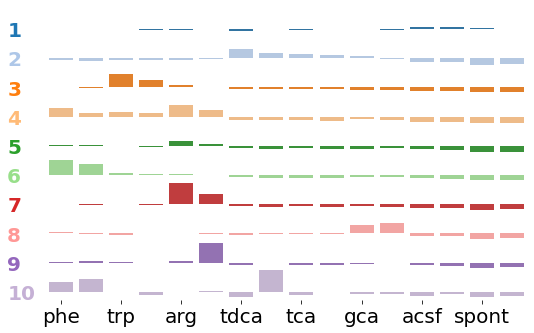

In [24]:
importlib.reload(caclust)
%matplotlib inline
cluster_cmap = 'tab20'
cluster_mean_df_raw = caclust.get_cluster_mean_df(data.transpose(), communities_raw)
fig = caclust.plot_cluster_tuning(cluster_mean_df_raw, cmap=cluster_cmap)
fig_dir = dtpar.fig_dir
fig.savefig(os.path.join(fig_dir, f"cluster_mean_{region}.svg"))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6_arg-phe vs. 6_phe-trp: t-test independent samples, P_val:6.717e-01 t=4.354e-01
7_arg-phe vs. 7_phe-trp: t-test independent samples, P_val:1.344e-01 t=1.616e+00
8_arg-phe vs. 8_phe-trp: t-test independent samples, P_val:2.457e-01 t=-1.226e+00
9_arg-phe vs. 9_phe-trp: t-test independent samples, P_val:4.967e-01 t=-7.029e-01
10_arg-phe vs. 10_phe-trp: t-test independent samples, P_val:3.284e-01 t=1.064e+00
3_phe-trp vs. 3_naive: t-test independent samples, P_val:4.045e-01 t=8.670e-01
4_phe-arg vs. 4_arg-phe: t-test independent samples, P_val:3.385e-01 t=-9.866e-01
4_phe-trp vs. 4_naive: t-test independent samples, P_val:7.062e-01 t=3.869e-01
5_phe-arg vs. 5_arg-phe: t-test independent samples, P_val:3.907e-01 t=-8.823e-01
5_arg-phe vs. 5_phe-trp: t-test independent samples, P_val:1.542e-01 t=-1.530e+00
2_phe-

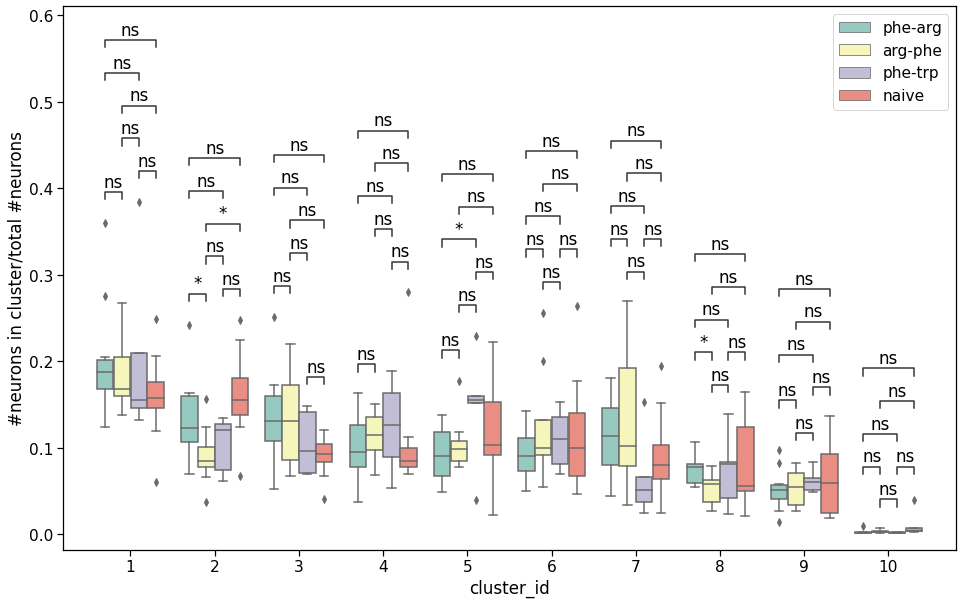

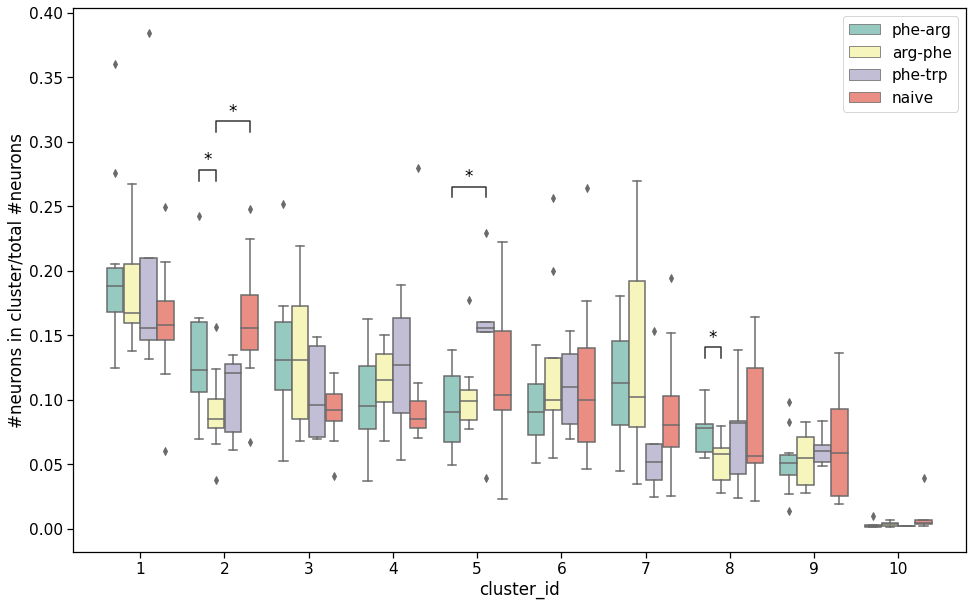

In [25]:
importlib.reload(caclust)
from itertools import combinations
labels = communities_raw


n_clusters = len(np.unique(labels))
cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cluster_count_df = cluster_df.groupby('train_cond', sort=False).cluster_id.value_counts(normalize=True).sort_index().reindex(dtpar.cond_list, level='train_cond')
cluster_count_df

cond_pair = list(combinations(dtpar.cond_list, 2))
all_pairs = []

for cluster_id in range(1, n_clusters+1):
    all_pairs.extend([[(cluster_id, x[0]), (cluster_id, x[1])] for x in cond_pair])
    
cluster_df = pd.DataFrame(labels.reshape(1,-1), columns=all_response.columns)
cluster_df = cluster_df.transpose().rename(columns={0:'cluster_id'}).reset_index()
cluster_df['train_cond']= cluster_df['fish_id'].map(training_dict)
cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']

grouped_cluster_id = cluster_df.groupby(['fish_id','train_cond'], sort=False).cluster_id
cluster_count_df = grouped_cluster_id.value_counts(normalize=True).sort_index().reindex(cond_list, level='train_cond')

cluster_count_df = cluster_count_df.rename('ratio').reset_index()
cluster_count_df

annotator, fig1 = caclust.plot_cluster_cont_with_stat(cluster_count_df, all_pairs, cond_list)

new_pairs = caclust.get_significant_pairs(annotator)
new_pairs

annotator2, fig2 = caclust.plot_cluster_cont_with_stat(cluster_count_df, new_pairs, cond_list)
fig2.savefig(os.path.join(fig_dir, f"cluster_cont_{region}.svg"))

In [23]:
cluster_df.to_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))

In [24]:
cluster_df = pd.read_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))

In [27]:
importlib.reload(dtpar)
from skimage.io import imsave
import catrace.nrn_coord as caroi
importlib.reload(caroi)
%matplotlib inline
data_root_dir = dtpar.data_root_dir
cluster_stack_dir = os.path.join(dtpar.analysis_dir, 'cluster_stack')
save_fig = True
for exp_name, cond in dtpar.exp_list:
    print(exp_name)
    exp_dir = os.path.join(data_root_dir, exp_name, region)
    stack_name = f'{region}_{exp_name}'
    meta_df = cluster_df.loc[cluster_df['fish_id'] == exp_name]
    mstack = caroi.map_meta_to_roi_stack(exp_dir, meta_df, 'cluster_id')
    # np.save(mstack, os.path.join(cluster_stack_dir, 'stacks', '{region}_{expname}.npz'))
    imsave(os.path.join(cluster_stack_dir, 'stacks', f'{stack_name}.tif'), mstack)
    fig = caroi.plot_meta_stack(mstack, cluster_cmap, title=stack_name)
    if save_fig:
        fig.savefig(os.path.join(cluster_stack_dir, 'figures', f'{stack_name}.svg'))
    plt.close()

2021-02-05-DpOBEM-JH9
2021-03-18-DpOBEM-JH10
2021-03-19-DpOBEM-JH10
2021-04-02-DpOBEM-JH11
2021-04-03-DpOBEM-JH11
2021-05-01-DpOBEM-JH13
2021-05-22-DpOBEM-JH14
2021-07-15-DpOBEM-N2
2021-07-16-DpOBEM-N3
2021-07-30-DpOBEM-JH17
2021-07-31-DpOBEM-JH17
2021-09-02-DpOBEM-JH18
2021-09-03-DpOBEM-JH18
2021-09-04-DpOBEM-JH18
2021-09-15-DpOBEM-JH20
2021-09-17-DpOBEM-JH20
2021-09-18-DpOBEM-JH20
2021-09-29-DpOBEM-JH21
2021-10-01-DpOBEM-JH21
2021-10-02-DpOBEM-JH21
2021-11-10-DpOBEM-JH23
2021-11-14-DpOBEM-JH23
2021-11-24-DpOBEM-JH24
2021-11-27-DpOBEM-JH24
2021-11-26-DpOBEM-JH24
2021-12-10-DpOBEM-N4
2021-12-31-DpOBEM-N7
2022-01-23-DpOBEM-N8
2022-01-30-DpOBEM-N9
2022-02-13-DpOBEM-N10
2022-02-20-DpOBEM-N11


In [17]:
from skimage.io import imread
%matplotlib qt5
exp_name = '2021-07-31-DpOBEM-JH17'
stack_name = f'{region}_{exp_name}'
mstack = imread(os.path.join(cluster_stack_dir, 'stacks', f'{stack_name}.tif'))
fig = caroi.plot_meta_stack(mstack, cluster_cmap, title=stack_name)